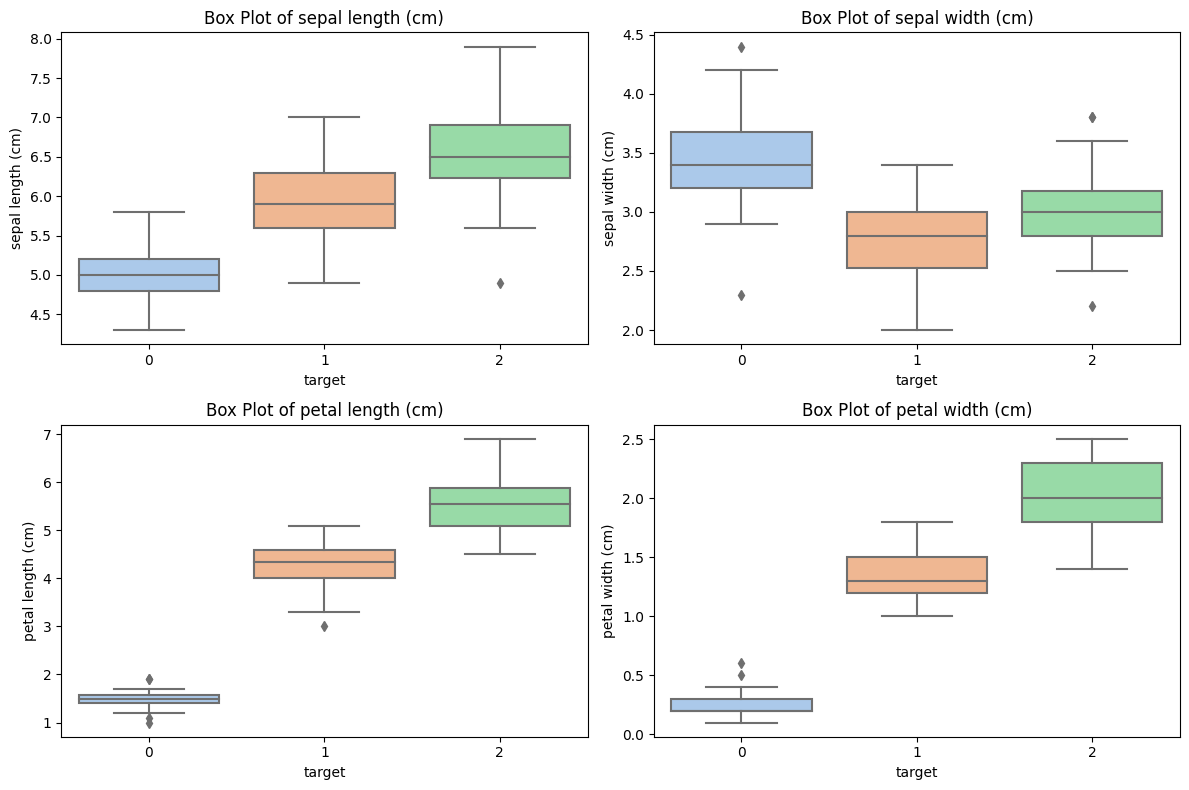

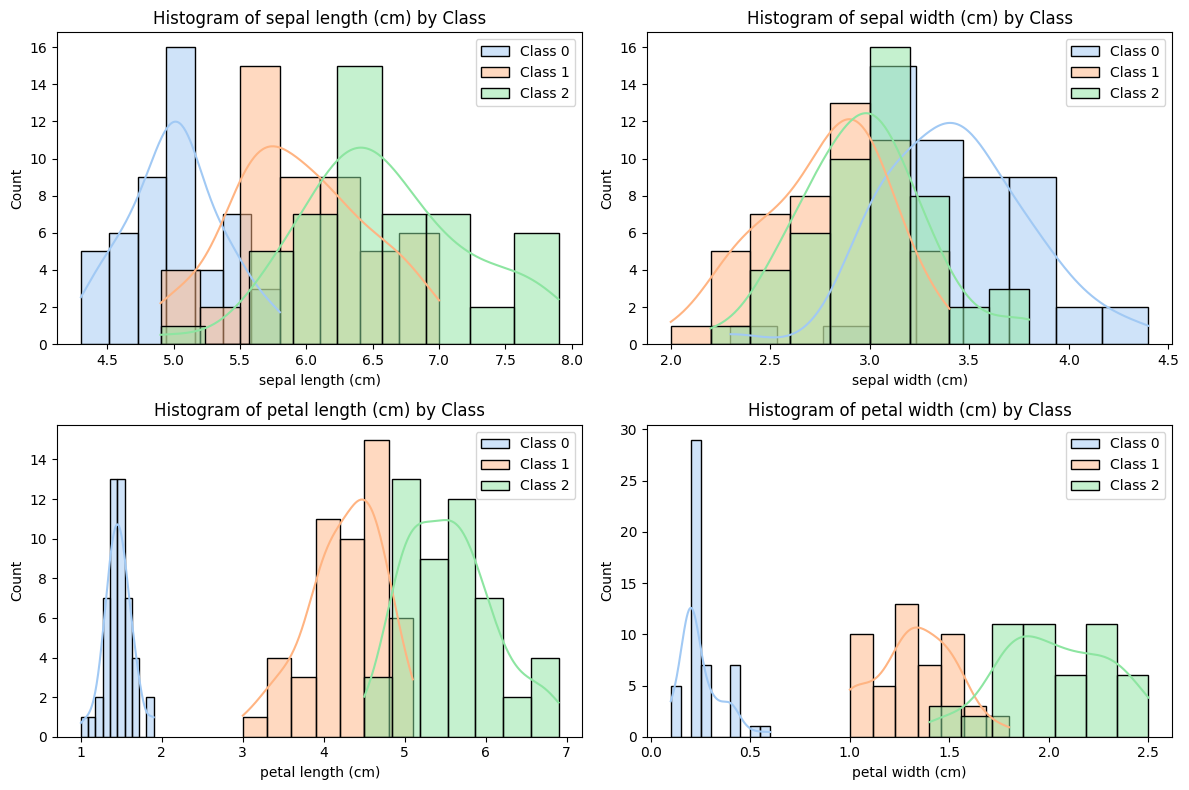

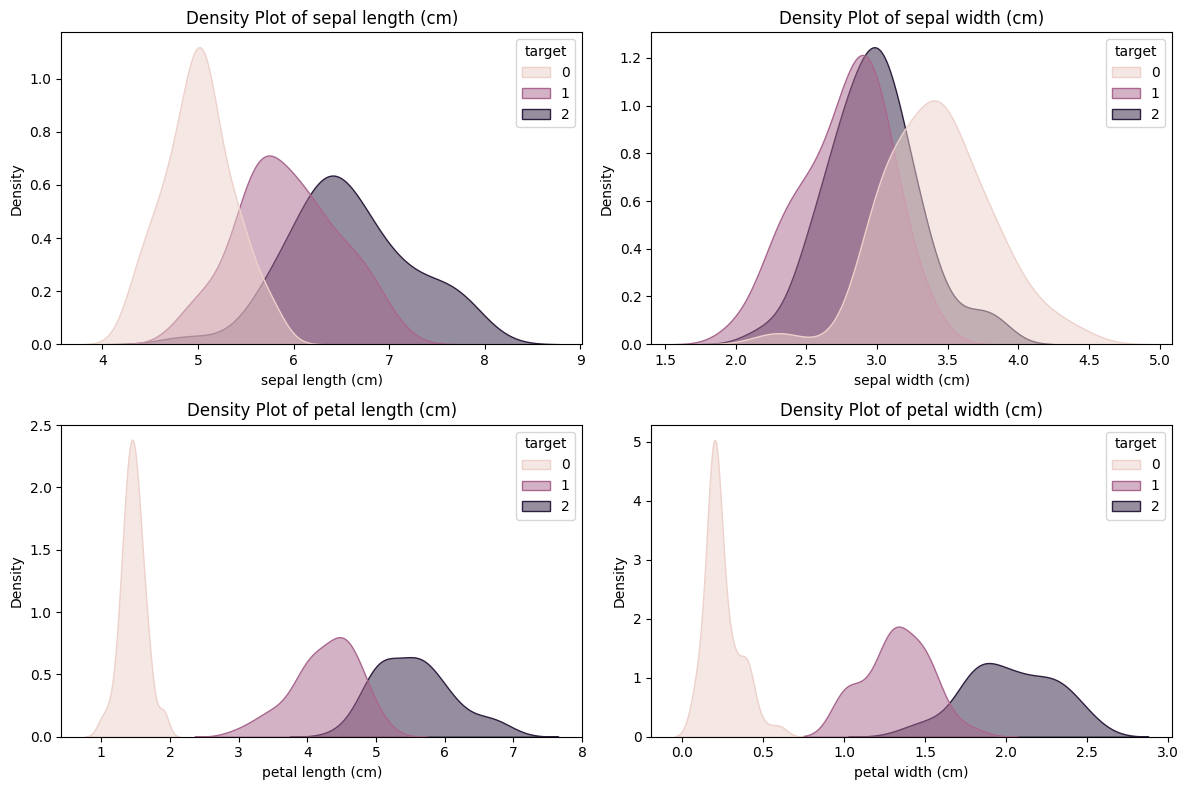

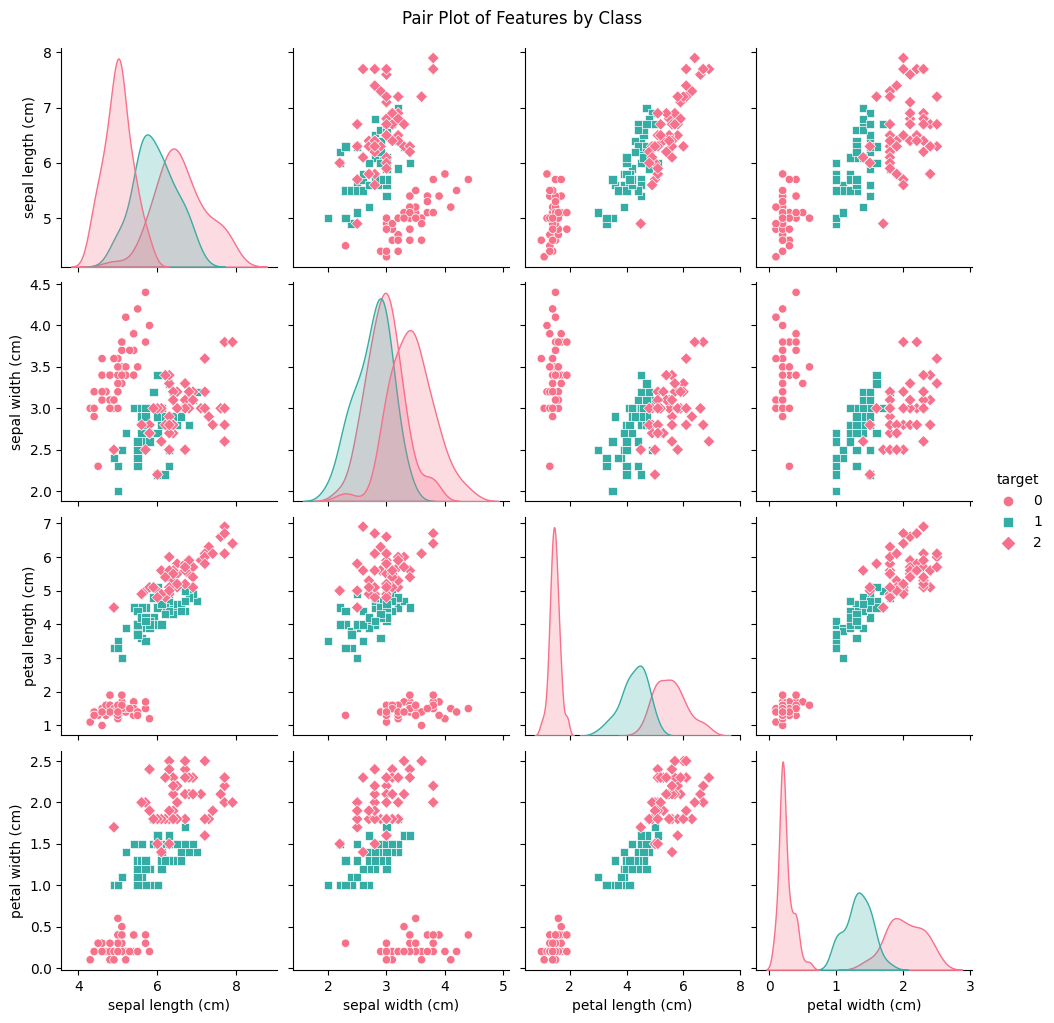

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (using Iris dataset as an example)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Combine features and target for easier plotting
df = pd.concat([X, y], axis=1)

# Set the color palette for visual clarity
sns.set_palette("pastel")

# 1. Box Plot: Visualize the distribution of each feature across classes
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="target", y=column, data=df)
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

# 2. Histogram: Visualize the distribution overlap for each feature per class
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    for label in df["target"].unique():
        sns.histplot(df[df["target"] == label][column], kde=True, label=f"Class {label}", alpha=0.5)
    plt.title(f"Histogram of {column} by Class")
    plt.legend()
plt.tight_layout()
plt.show()

# 3. Density Plot: Check density overlap for each feature between classes
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=column, hue="target", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Density Plot of {column}")
plt.tight_layout()
plt.show()

# 4. Pair Plot: Visualize feature interactions across classes
sns.pairplot(df, hue="target", diag_kind="kde", palette="husl", markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Features by Class", y=1.02)
plt.show()


C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Feature importances from different models:
                   RandomForest  GradientBoosting   XGBoost  \
Feature                                                       
sepal length (cm)      0.104105          0.004458  0.010128   
sepal width (cm)       0.044605          0.018869  0.030385   
petal length (cm)      0.417308          0.591267  0.738762   
petal width (cm)       0.433982          0.385406  0.220724   

                   LogisticRegression  
Feature                                
sepal length (cm)            0.049653  
sepal width (cm)             0.947431  
petal length (cm)            2.081804  
petal width (cm)             1.292506  


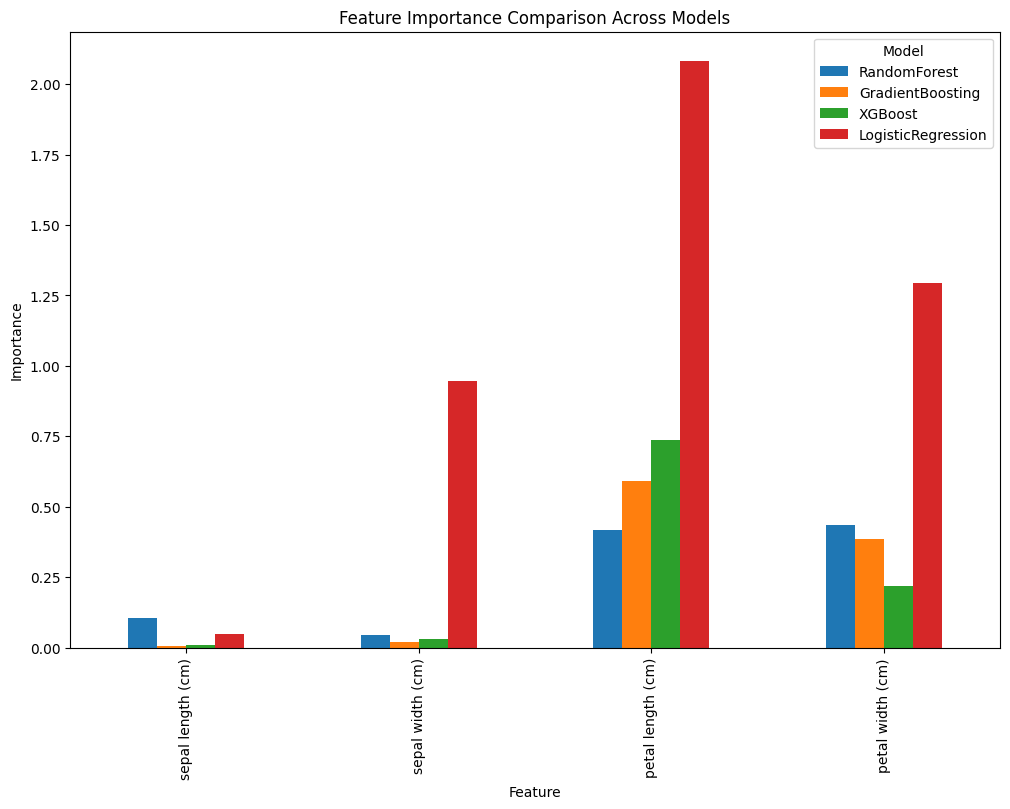

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (replace with your own data if needed)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to hold feature importances
feature_importance_df = pd.DataFrame({
    "Feature": X.columns
})

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance_df['RandomForest'] = rf.feature_importances_

# 2. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
feature_importance_df['GradientBoosting'] = gb.feature_importances_

# 3. XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
feature_importance_df['XGBoost'] = xgb.feature_importances_

# 4. Logistic Regression with L1 regularization (for linear feature importance)
scaler = StandardScaler()  # Standardize features for logistic regression
X_train_scaled = scaler.fit_transform(X_train)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Coefficients as feature importance for Logistic Regression
feature_importance_df['LogisticRegression'] = np.abs(log_reg.coef_).mean(axis=0)

# Set feature names as index
feature_importance_df.set_index("Feature", inplace=True)

# Display feature importances
print("Feature importances from different models:")
print(feature_importance_df)

# Plot feature importances from each model
feature_importance_df.plot(kind='bar', figsize=(12, 8))
plt.title("Feature Importance Comparison Across Models")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.legend(title="Model")
plt.show()
